<a href="https://colab.research.google.com/github/MaliheDahmardeh/CL-per-MNIST/blob/main/per-MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
!git clone https://github.com/MaliheDahmardeh/CL-per-MNIST

Cloning into 'CL-per-MNIST'...
remote: Enumerating objects: 67, done.
remote: Counting objects: 100% (67/67), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 67 (delta 16), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (67/67), 1.65 MiB | 5.16 MiB/s, done.
Resolving deltas: 100% (16/16), done.


In [63]:
%cd CL-per-MNIST

/content/CL-per-MNIST/CL-per-MNIST/CL-per-MNIST/CL-per-MNIST/CL-per-MNIST


In [64]:
!ls

buffer.py  data.py  er.py   model.py	     README.md	VAE
data	   dataset  mir.py  per-MNIST.ipynb  utils.py


In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

# Load MNIST dataset
mnist_dataset = tfds.load("mnist")

# Access training and test splits
train_data, test_data = mnist_dataset["train"], mnist_dataset["test"]

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
!wget www.di.ens.fr/~lelarge/MNIST.tar.gz
!tar -zxvf MNIST.tar.gz

--2024-02-29 00:15:41--  http://www.di.ens.fr/~lelarge/MNIST.tar.gz
Resolving www.di.ens.fr (www.di.ens.fr)... 129.199.99.14
Connecting to www.di.ens.fr (www.di.ens.fr)|129.199.99.14|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.di.ens.fr/~lelarge/MNIST.tar.gz [following]
--2024-02-29 00:15:42--  https://www.di.ens.fr/~lelarge/MNIST.tar.gz
Connecting to www.di.ens.fr (www.di.ens.fr)|129.199.99.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/x-gzip]
Saving to: ‘MNIST.tar.gz’

MNIST.tar.gz            [             <=>    ]  33.20M  11.6MB/s    in 2.9s    

2024-02-29 00:15:45 (11.6 MB/s) - ‘MNIST.tar.gz’ saved [34813078]

MNIST/
MNIST/raw/
MNIST/raw/train-labels-idx1-ubyte
MNIST/raw/t10k-labels-idx1-ubyte.gz
MNIST/raw/t10k-labels-idx1-ubyte
MNIST/raw/t10k-images-idx3-ubyte.gz
MNIST/raw/train-images-idx3-ubyte
MNIST/raw/train-labels-idx1-ubyte.gz
MNIST/raw/t10k-images-idx3-ubyte
MNIST/raw/tra

In [ ]:
import numpy as np
from tensorflow.keras.datasets import mnist

# Load the original MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Define the number of permutations
num_permutations = 10

# Create permuted datasets
for i in range(num_permutations):
    # Generate a random permutation of pixel indices
    permutation = np.random.permutation(x_train.shape[1] * x_train.shape[2])

    # Apply the permutation to the training and testing data
    x_train_permuted = x_train.reshape(-1, 28*28)[:, permutation].reshape(-1, 28, 28)
    x_test_permuted = x_test.reshape(-1, 28*28)[:, permutation].reshape(-1, 28, 28)

    # Save the permuted datasets
    np.savez_compressed(f'mnist_permuted_{i}.npz', x_train=x_train_permuted, y_train=y_train,
                        x_test=x_test_permuted, y_test=y_test)

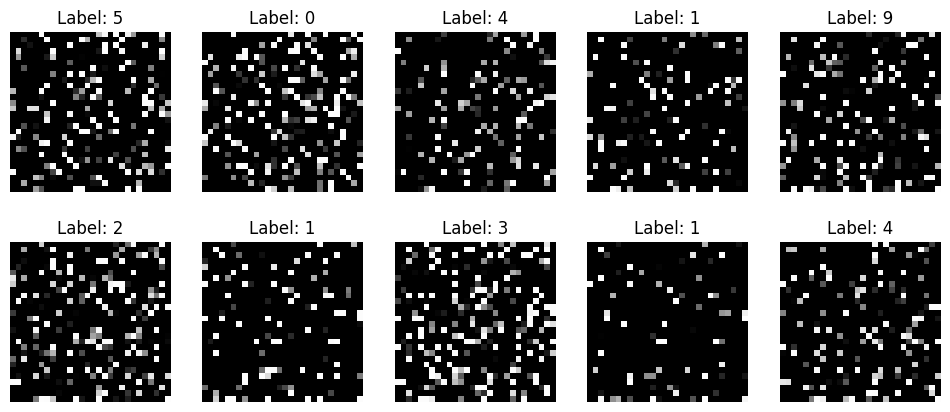

Labels in training set: [0 1 2 3 4 5 6 7 8 9]
Labels in test set: [0 1 2 3 4 5 6 7 8 9]
Mean pixel value in original MNIST: 33.318421449829934
Mean pixel value in permuted MNIST: 33.318421449829934
Standard deviation of pixel values in original MNIST: 78.56748998339798
Standard deviation of pixel values in permuted MNIST: 78.56748998339805


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load a permuted dataset
permuted_data = np.load('mnist_permuted_0.npz')

# Extract data and labels
x_train_permuted, y_train = permuted_data['x_train'], permuted_data['y_train']
x_test_permuted, y_test = permuted_data['x_test'], permuted_data['y_test']

# Visualize sample images
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_train_permuted[i], cmap='gray')
    ax.set_title(f"Label: {y_train[i]}")
    ax.axis('off')
plt.show()

# Check labels
print("Labels in training set:", np.unique(y_train))
print("Labels in test set:", np.unique(y_test))

# Compare statistics
print("Mean pixel value in original MNIST:", np.mean(x_train))
print("Mean pixel value in permuted MNIST:", np.mean(x_train_permuted))
print("Standard deviation of pixel values in original MNIST:", np.std(x_train))
print("Standard deviation of pixel values in permuted MNIST:", np.std(x_train_permuted))